# <center> COMP 562 : Inroduction to Machine Learning </center>
## <center> <font color='red'>Lecture 7 : BigData and Stochastic Gradient Descent, Generative vs. Discriminative Models </font> </center> 
### <center> Mahmoud Mostapha </center> 
### <center> Department of Computer Science -- UNC Chapel Hill</center>
###  <center> September 21, 2018 </center>

# COMP 562 – Lecture 7

Plan for today

1. Review multi-class logistic regression
2. Gradients multi-class logistic regression log-likelihood
3. BigData and stochastic gradient descent 
4. Look at an example of online learning
5. Multivariate Gaussian distribution
6. Generative vs. discriminative models

$$
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ | }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
$$

# Last Time -- Multiclass Logistic Regression

We can write out probability of partcular class using softmax

$$
p(y=c\given\xx,\beta_0,B) = \frac{ \myexp{\beta_{0,c} + \xx^T\bbeta_c}}{\sum_{k=1}^C\myexp{\beta_{0,k} + \xx^T\bbeta_k}}
$$

<img src="./Images/multiclass.gif" width="800" align="center"/>


# Last Time -- Multiclass Logistic Regression

Dimensions:
* Feature matrix : $X$ $\rightarrow$ $N\times (p+1)$
* Label matrix : $Y$ $\rightarrow$ $N\times C$
* Weight matrix : $B$ $\rightarrow$ $(p+1)\times C$

Likelihood is 

$$
\likelihood(B\given Y,X) = \underbrace{\prod_{i=1}^N}_{\textrm{samples}}\underbrace{\prod_{c=1}^C}_{\textrm{classes}}\left[\frac{ \myexp{\xx_i^T\bbeta_c}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}\right]^{y_{i,c}}
$$

Log-likelihood is

$$
\loglik(\beta_0,B\given Y,X) = \sum_{i=1}^N
\sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right)
$$

Ridge regularized log-likelihood

$$
\begin{aligned}
\penloglik(B\given Y,X) =& \sum_{i=1}^N
\sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right) - \frac{\lambda}{2}\sum_{k=1}^C \sum_{j=1}^p \beta_{j,k}^2
\end{aligned}
$$

Note that we keep the last column of $B$ fixed at 0 to get rid of excess parameters

# Gradients of Multiclass Logistic Regression log-likelihood

We will work this out in a pedestrian fashion and then obtain a compact expression:

$$
\loglik(B)=\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\underbrace{\xx_i^T\bbeta_c}_{\textrm{involves only $\beta_c$}} - \underbrace{\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}}_{\textrm{involves all columns of $B$}} \right) 
$$


Break it down

$$
\begin{aligned}
\loglik(B)&=\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c\right) -\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\underbrace{\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}}_{\textrm{does not involve c}}
\end{aligned}
$$

Then

$$
\begin{aligned}
\loglik(B)&=\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c\right) -\sum_{i=1}^N \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \underbrace{\sum_{c=1}^C y_{i,c}}_{= 1 \textrm{(y is one-hot)}}
\end{aligned}
$$

Hence

$$
\begin{aligned}
\loglik(B)&=\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c\right) -\sum_{i=1}^N\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}
\end{aligned}
$$

$$
\begin{aligned}
\loglik(B)&=\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c\right) -\sum_{i=1}^N\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}
\end{aligned}
$$

Now we need to compute log-likelihood partial derivative with respect to $\beta_{j,c}$ ( $\beta$ associated with feature $j$ and class $c$ ) 

$$
\begin{aligned}
\frac{\partial}{\partial\beta_{j,c}} \loglik(B) &= \sum_{i=1}^N y_{i,c}x_{i,j} -\sum_{i=1}^N \frac{\partial}{\partial \beta_{j,c}}\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}
\end{aligned}
$$

On board we will work out 

$$
\frac{\partial}{\partial \beta_{j,c}}\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} = \boxed{\frac{\myexp{\xx_i^T\bbeta_c}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}}x_{i,j}
$$

Hence 

$$
\begin{aligned}
\frac{\partial}{\partial\beta_{j,c}} \loglik(B) &= \sum_{i=1}^N y_{i,c}x_{i,j} -\sum_{i=1}^N \frac{\myexp{\xx_i^T\bbeta_c}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}x_{i,j}
\end{aligned}
$$

For compactness, model's probability of class $c$ for sample $i$ will be denoted $\mu_{i,c}$

$$
\mu_{i,c} = \frac{\myexp{\xx_i^T\bbeta_c}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}
$$

and

$$
\frac{\partial}{\partial\beta_{j,c}} \loglik(B) = \sum_{i=1}^N y_{i,c}x_{i,j}
-\sum_{i=1}^N \mu_{i,c}x_{i,j} = \sum_{i=1}^N x_{i,j}\underbrace{(y_{i,c} - \mu_{i,c})}_{\textrm{residual}}
$$


$$
\frac{\partial}{\partial\beta_{j,c}} \loglik(B) = \sum_{i=1}^N \underbrace{x_{i,j}}_{\textrm{feature $j$}}\underbrace{(y_{i,c} - \mu_{i,c})}_{\ \ \ \textrm{ residual in} \\ \textrm{predicting class $c$}} 
$$

In words, partial derivative of log-likelihood with respect to $j^\tth$ feature's weight for class $c$ is inner product between the feature and disagreement between prediction and the true label

Gradient of log likelihood with respect to a column of $B$

$$
\nabla_{\beta_c} \loglik(B) = \sum_{i=1}^N (y_{i,c} - \mu_{i,c})\xx_i
$$

Gradient of ridge regularized log-likelihood with respect to a column of $B$

$$
\nabla_{\beta_c} \penloglik(B) = \sum_{i=1}^N (y_{i,c} - \mu_{i,c})\xx_i - \lambda\left[\begin{aligned}0\\\ones_p\end{aligned}\right]
$$

# BigData and Stochastic Gradient

If the number of samples $N$ is in thousands rather than millions then computation of gradients like

$$
\begin{aligned}
\mu_{i,c} &= \frac{\myexp{\xx_i^T\bbeta_c}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}\\
\nabla_{\beta_c} \loglik(B) &= \sum_{i=1}^N (y_{i,c} - \mu_{i,c})\xx_i
\end{aligned}
$$

is not overly expensive

Methods that use the whole dataset on every update of parameters are called **batch** methods

# BigData and Stochastic Gradient

Once the number of samples becomes large iterating over all of them has diminishing returns

Stochastic gradient methods compute gradients using a portion of data called **mini-batches**

An extreme example of this is **online learning** -- data is streamed one sample at a time

Note: data is usually **randomaly permuted (shuffled)** before each iteration when using stochastic gradient methods



* In pseducode, mini-batch gradient ascent/descent looks something like this:

<img src="./Images/GD.PNG" width="1200" align="center"/>

* In pseducode, mini-batch gradient ascent/descent looks something like this:

<img src="./Images/SGD.PNG" width="1200" align="center"/>


Updating parameters based on a small set of data if not guaranteed to monotonically improve log-likelihood

Hence, step-size cannot be chosen using line-search 

Instead, step sizes for each iteration $k$ are computed 

$$
\begin{aligned}
t^{(k)} &= \left(t^{(k-1)}\right)^{1-\epsilon} & \epsilon \in [0,1]\\
t^{(k)} &= \frac{1}{\tau + k} & \tau > 0 
\end{aligned}
$$

and lead to diminishing step-size (learning rate)

In [22]:
def stochastic_gradient_ascent(f,x,get_next_batch,iters,epsilon=0.99):    
    for it in range(iters):
        batch = get_next_batch()
        v,g = f(x,batch)    
        x = x + step*g
        step = step**(1.0 - epsilon)
    return x

def stochastic_gradient_descent(f,x,get_next_batch,iters,epsilon=0.99):    
    for it in range(iters):
        batch = get_next_batch()
        v,g = f(x,batch)    
        x = x - step*g
        step = step**(1.0 - epsilon)
    return x

# A Simple Example of Online Learning

In [23]:
import numpy
import matplotlib.pyplot as plt
% matplotlib inline
# plotting 
def draw_line(w,b,c='k',linewidth=1):
    if numpy.abs(w[1]) > numpy.abs(w[0]):
        y1 = -(1.0*w[0] + b)/w[1]
        y0 = -b/w[1]
        x1 = 1
        x0 = 0
    else:
        x1 = -(1.0*w[1] + b)/w[0]
        x0 = -b/w[0]
        y1 = 1
        y0 = 0

    h = plt.plot([x0,x1],[y0,y1],
                 c,alpha=1.0,
                 linewidth=linewidth)
    plt.xlim([0,1])
    plt.ylim([0,1])
    return h

hs = []
def add_to_plot(sample,w,b):
    xi,yi = sample
    pt = plt.annotate(str(int(yi)),xy = xi,
                 alpha=1.0,
                 horizontalalignment='center', 
                 verticalalignment='center')
    h, = draw_line(w,b)
    
    for other in hs:
        other.set_alpha(0.99*other.get_alpha())
    hs.append(h)
    hs.append(pt)

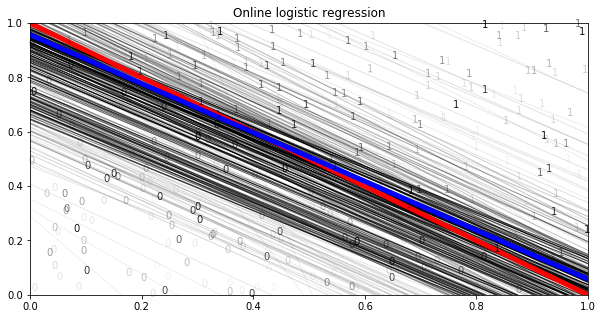

In [24]:
# A simple example of online learning

# sample_generator generates a sample at a time
# if you are curious about what is going on here
# read about python generators.

fig = plt.figure(figsize=(10, 5))

def sample_generator(N,true_w,true_b):
    true_w = numpy.asarray(true_w)
    d = len(true_w)
    for i in range(N):
        x = numpy.random.rand(d)
        y = float((numpy.dot(x,true_w) + true_b) > 0)
        yield x,y

def update(w,b,sample,it):
    xi,yi = sample
    v = numpy.exp(numpy.dot(xi.transpose(),w) + b)
    res = yi - v/(1.0 + v)
    gw = res*xi  
    gb = res
    # step size diminishes with iterations
    step = 1.0/(it**0.25)
    w = w + step*gw
    b = b + step*gb
    return w,b

numpy.random.seed(2)
# synthetic data generator for illustration purposes    
true_w = [1.0,1.0]
true_b = -1.0
N = 300
data_stream = sample_generator(N,true_w,true_b)


# actual fitting of the parameters
# initialization
w = numpy.asarray([-0.1,-0.2])
b = 0.05
it = 0

# while more data is available
while True:
    try:
        (xi,yi) = data_stream.next()
        it += 1    
        w,b = update(w,b,(xi,yi),it)
        add_to_plot((xi,yi),w,b)
    except StopIteration:
        # no more data
        break
        
draw_line(true_w,true_b,'r',linewidth=5)
draw_line(w,b,'b',linewidth=5)

plt.title('Online logistic regression')

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)


[2.94467154 3.2747466 ] -3.1353888197636963


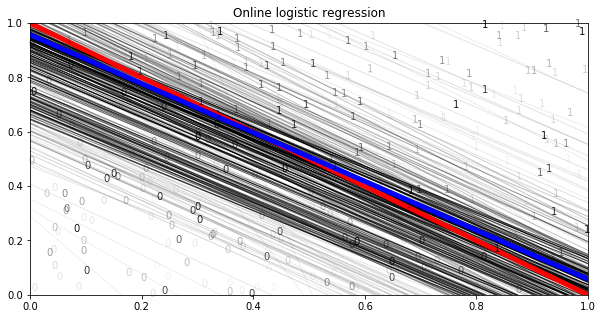

In [25]:
print w,b
show_figure(fig)
plt.show()

<img src="./Images/SGD.gif" width="600" align="center"/>

* Challanges associated with SGD include:
    * Choosing a proper learning rate can be difficult
        * Learning rate schedules try to adjust the learning rate during training 
    * Mini-batch gradients are noisy compared to the gradient on the whole data batch
        * Sophisticated SGD schemes involve use of momentum -- averaging of gradients
    * Same learning rate applies to all parameter updates
        * Advanced SGD methods such as Adagrad, Adadelta, and Adam

# Linear Transformations

We are going to review some of the linear algebra/analytic geometry

We will look at examples in 2D, $\xx \in \reals^2$, and use $2 \times 2$ matrices


In [26]:
import numpy
import matplotlib.pyplot as plt

def draw_vector(zz,color='k',label=None):
    z1 = zz[0]
    z2 = zz[1]
    length = numpy.sqrt(z1**2+z2**2)
    head_length = 0.1*numpy.min([length,1.0])
    z1 = z1 - z1/length*head_length
    z2 = z2 - z2/length*head_length
    plt.arrow(0,0,z1,z2,ec=color,fc=color,
              head_length=head_length,head_width=0.1)    
    if not label is None:
        plt.annotate(label,(z1,z2))

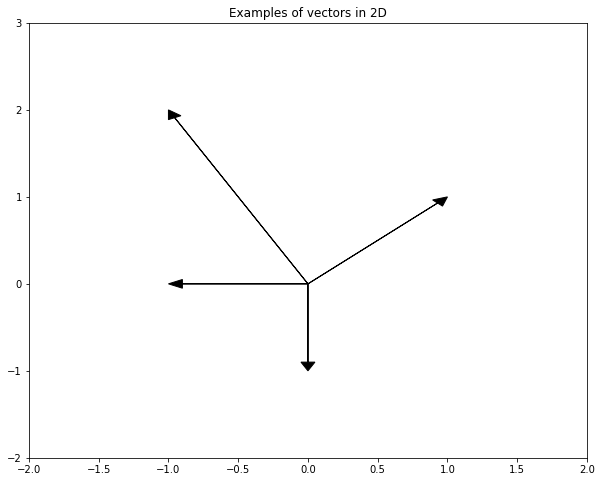

In [27]:
fig = plt.figure(figsize=(10, 8))
draw_vector([1.0,1.0])
draw_vector([-1.0,2.0])
draw_vector([-1.0,0])
draw_vector([0,-1.0])
#plt.axis('equal')
plt.xlim([-2,2])
plt.ylim([-2,3])
plt.title('Examples of vectors in 2D');

In [28]:
def illustrate_linear_transformation(A,Z):
    for i in range(Z.shape[1]):
        zz = Z[:,i]
        draw_vector(zz,label='$\mathbf{z}_'+str(i)+'$')        
        xx = numpy.dot(A,zz) # perform linear transformation
        draw_vector(xx,'r',label='$A\mathbf{z}_'+str(i) + '$')
        
    #plt.axis('equal')
    plt.axis([-2.5,2,-3,4])    

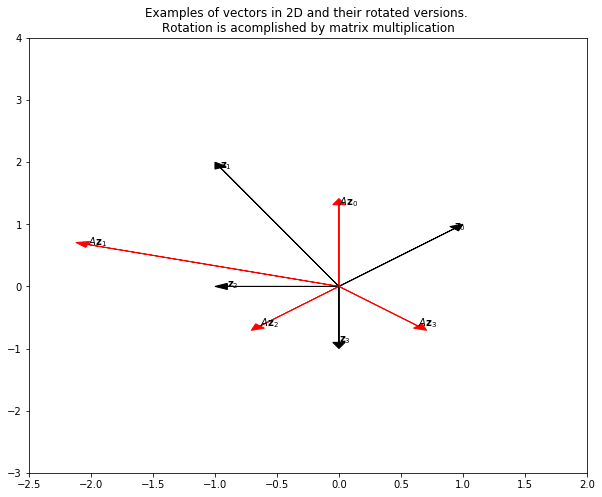

In [29]:
Z = numpy.asarray([[1.0,-1.0,-1.0, 0.0],
                   [1.0, 2.0, 0.0,-1.0]])          
theta = 2.0*numpy.pi/8.0
A = numpy.asarray([[numpy.cos(theta), -numpy.sin(theta)],
                   [numpy.sin(theta), numpy.cos(theta)]])
fig = plt.figure(figsize=(10, 8))
illustrate_linear_transformation(A,Z)
plt.title(('Examples of vectors in 2D and their rotated versions. \n'+ 'Rotation is acomplished by matrix multiplication'));

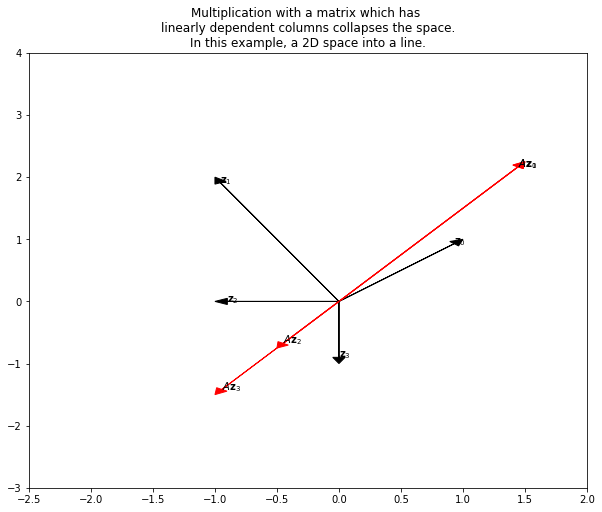

In [30]:
Z = numpy.asarray([[1.0,-1.0,-1.0, 0.0],
                    [1.0, 2.0, 0.0,-1.0]])    
A = numpy.asarray([[0.5 ,1.0],
                   [0.75,1.5]])
fig = plt.figure(figsize=(10, 8))
illustrate_linear_transformation(A,Z)
plt.title(('Multiplication with a matrix which has \n'+ 'linearly dependent columns collapses the space.\n' + 'In this example, a 2D space into a line.'));

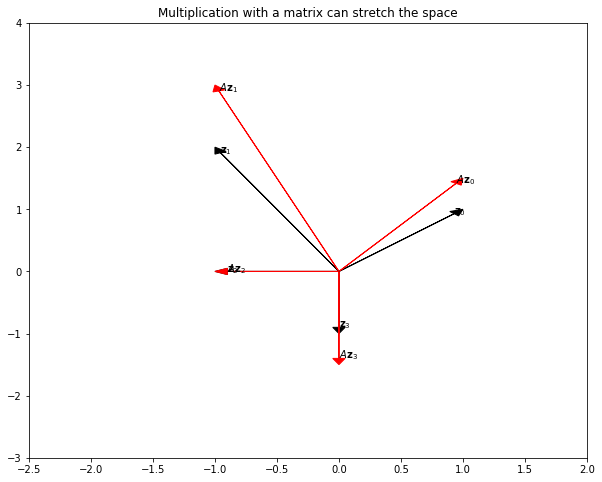

In [31]:
A = numpy.asarray([[1.0,0.0],
                   [0.0,1.5]])
Z = numpy.asarray([[1.0,-1.0,-1.0, 0.0],
                   [1.0, 2.0, 0.0,-1.0]])
fig = plt.figure(figsize=(10, 8))
illustrate_linear_transformation(A,Z)
plt.title('Multiplication with a matrix can stretch the space');

# Eigenvectors and Eigenvalues

For a linear transformation represented by matrix $A$, $\xx$ is an **eigenvector** if it is non-zero and

$$
A\xx = \lambda \xx
$$
$\lambda$ is called **eigenvalue**

In practice an eigenvector will be of length $1$, i.e., $\norm{\xx} = \sqrt{\sum_i x_i^2} = 1$.
You can interpret it as direction along which space gets scaled by $\lambda$

Matrix 
$$
A = \begin{bmatrix} 1.0 & 0.0 \\
0.0 & 2.0 \\
\end{bmatrix}
$$
has eigenvectors $\xx_1 = \begin{bmatrix}1.0\\0.0\end{bmatrix}$ and $\xx_2 = \begin{bmatrix} 0.0 \\ 1.0 \end{bmatrix}$, with corresponding eigenvalues $\lambda_1 = 1.0$ and $\lambda_2 = 2.0$.

[-0.11043782 -1.10043765]


[-2.5, 3, -3.5, 4]

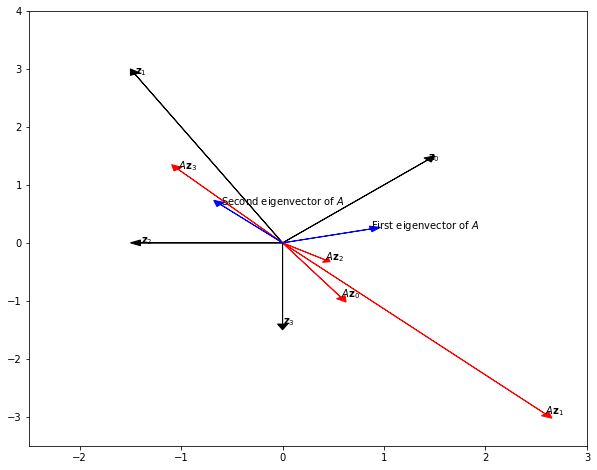

In [32]:
Z = 1.5*numpy.asarray([[1.0,-1.0,-1.0, 0.0],
                   [1.0, 2.0, 0.0,-1.0]])
numpy.random.seed(6)
A = numpy.random.randn(2,2)
fig = plt.figure(figsize=(10, 8))
illustrate_linear_transformation(A,Z)
l,W = numpy.linalg.eig(A)
print(l)
draw_vector(W[:,0],'b',label='First eigenvector of $A$')
draw_vector(W[:,1],'b',label='Second eigenvector of $A$')
plt.axis([-2.5,3,-3.5,4])    

# Multivariate Gaussian Distribution

We will first consider a simple generalization of a Gaussian distribution to 2D

$$
\begin{aligned}
z_1 &\sim \Gaussian{0}{\sigma_1^2}\\
z_2 &\sim \Gaussian{0}{\sigma_2^2}
\end{aligned}
$$


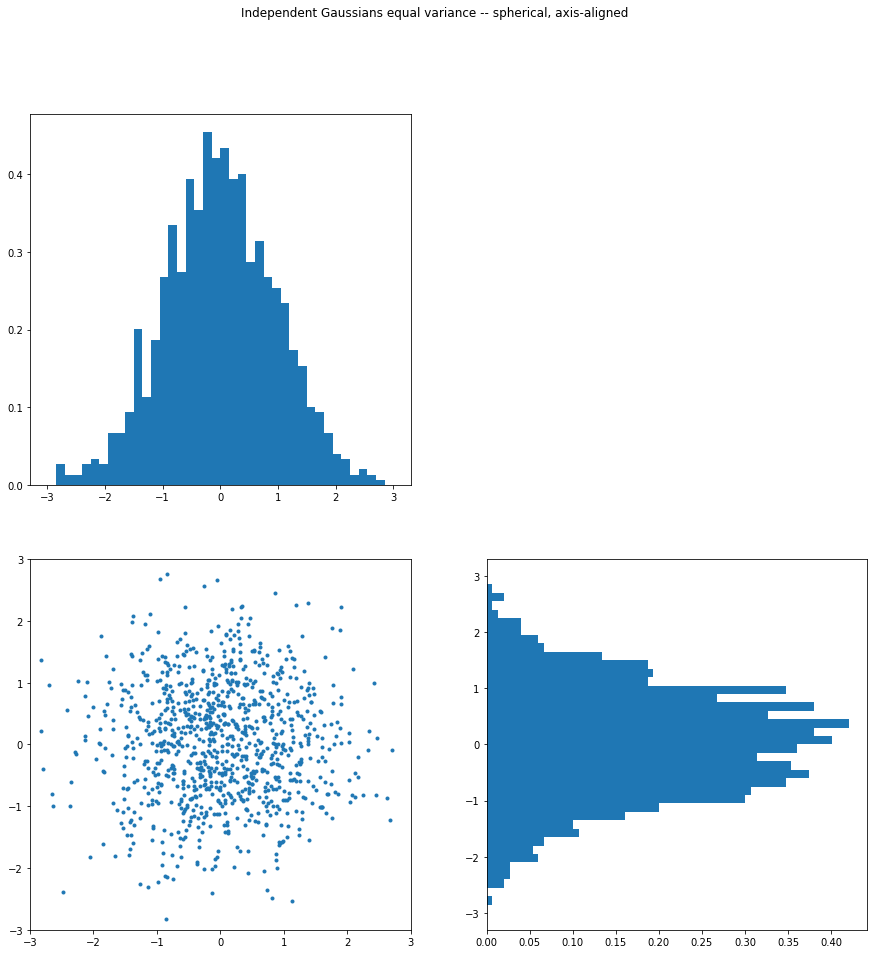

In [33]:
import matplotlib.pyplot as plt
sigma_1 = 1
sigma_2 = 1
bounds = [-3,3]
z1 = sigma_1*numpy.random.randn(1000)
z2 = sigma_2*numpy.random.randn(1000)
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.hist(z1,range=bounds,bins=40,normed=True)
plt.subplot(2,2,4)
plt.hist(z2,range=bounds,bins=40,orientation='horizontal',normed=True)
plt.subplot(2,2,3)
plt.plot(z1,z2,'.')
plt.xlim(bounds)
plt.ylim(bounds)
plt.suptitle('Independent Gaussians equal variance -- spherical, axis-aligned');

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

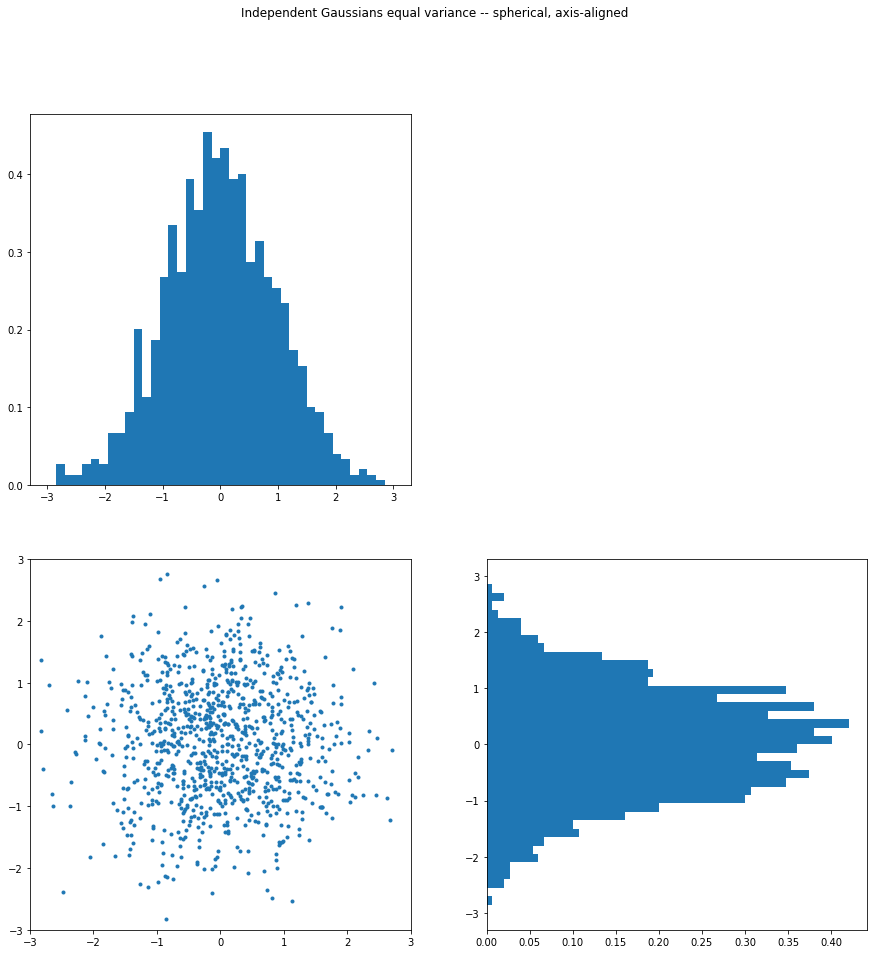

In [34]:
show_figure(fig)
plt.show()

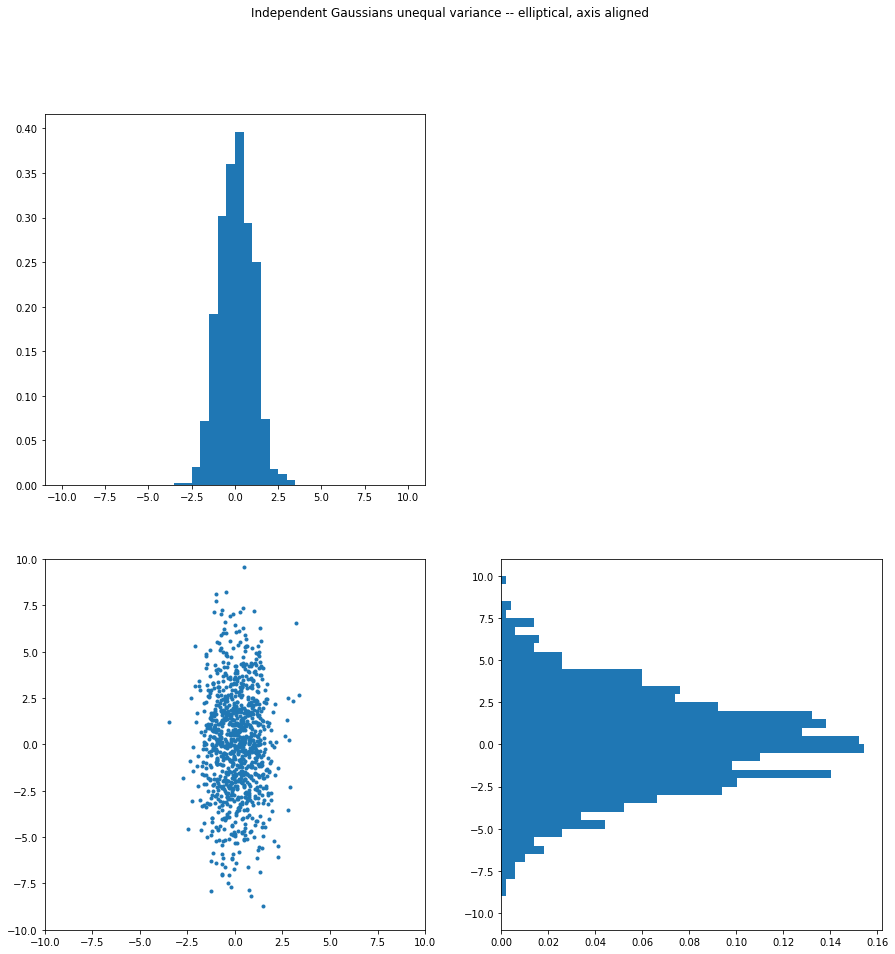

In [35]:
import matplotlib.pyplot as plt
sigma_1 = 1
sigma_2 = 3
bounds = [-10,10]
z1 = sigma_1*numpy.random.randn(1000)
z2 = sigma_2*numpy.random.randn(1000)
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.hist(z1,range=bounds,bins=40,normed=True)
plt.subplot(2,2,4)
plt.hist(z2,range=bounds,bins=40,orientation='horizontal',normed=True)
plt.subplot(2,2,3)
plt.plot(z1,z2,'.')
plt.xlim(bounds)
plt.ylim(bounds)
plt.suptitle('Independent Gaussians unequal variance -- elliptical, axis aligned');

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

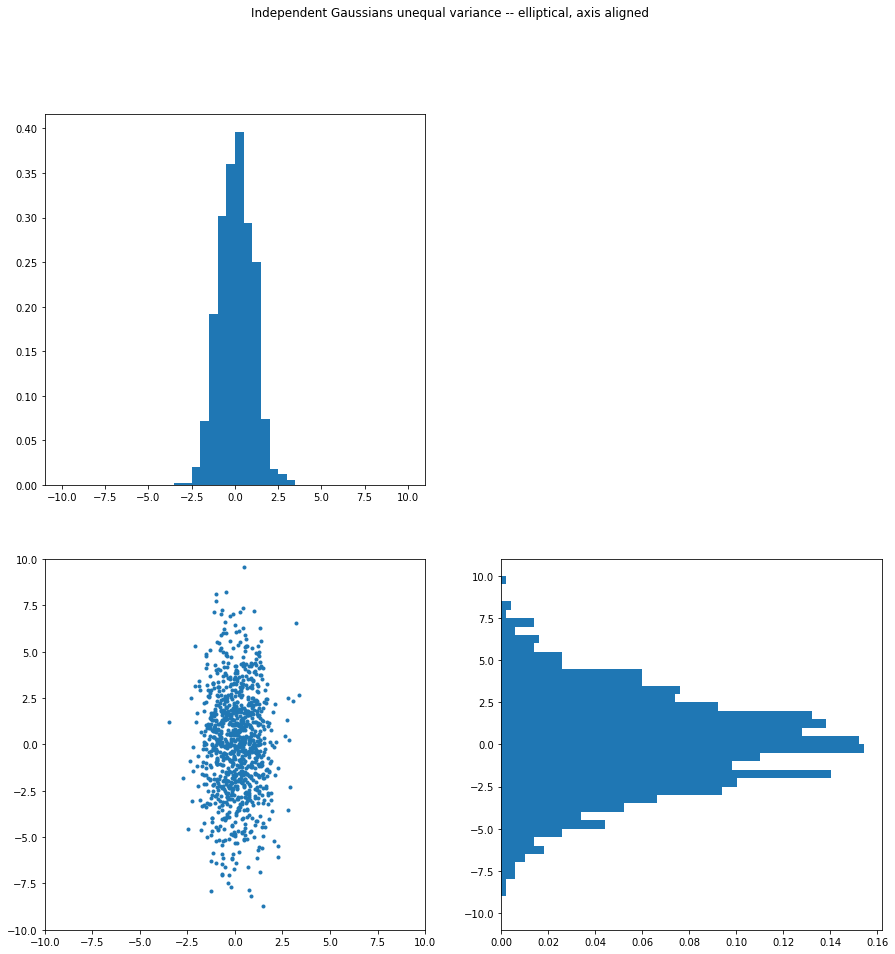

In [36]:
show_figure(fig)
plt.show()

# Multivariate Gaussian Distribution -- Independent Case

Since $z_1$ and $z_2$ are independent we can write out the joint 

$$
\begin{aligned}
p(z_1,z_2) &= p(z_1)p(z_2) \\
&= \frac{1}{\sqrt{2\pi\sigma_1^2} }
   \frac{1}{\sqrt{2\pi\sigma_2^2} }\myexp{-\frac{1}{2\sigma_1^2}z_1^2}\myexp{-\frac{1}{2\sigma_1^2}z_2^2}\\
&= \frac{1}{\sqrt{(2\pi)^2\sigma_1^2\sigma_2^2}}\myexp{ -\frac{1}{2\sigma_1^2}z_1^2  -\frac{1}{2\sigma_2^2}z_2^2}
\end{aligned}
$$

In fact, for multiple independent Gaussian random variables $z_1,...,z_p$ the joint is

$$
\begin{aligned}
p(z_1,\dots,z_p) &= \prod_i p(z_i) \\
&= (2\pi)^{-p/2}\left(\prod_{i=1}^p \sigma_i^2\right)^{-1/2}\myexp{-\sum_{i=1}^p \frac{1}{2\sigma_i^2}z_i^2}
\end{aligned}
$$

# Multivariate Gaussian Distribution -- Dependent Case

Suppose we have $p$ standard random variables  (0 mean, unit variance)

$$
\begin{aligned}
z_i \sim& \Gaussian{0}{1},&  i=1,\dots p
\end{aligned}
$$

and we are given a vector $\mmu$ of length $p$ and a full-rank matrix $A$ of size $p \times p$

What does distribution of $\xx = A\zz + \mmu$ look like?

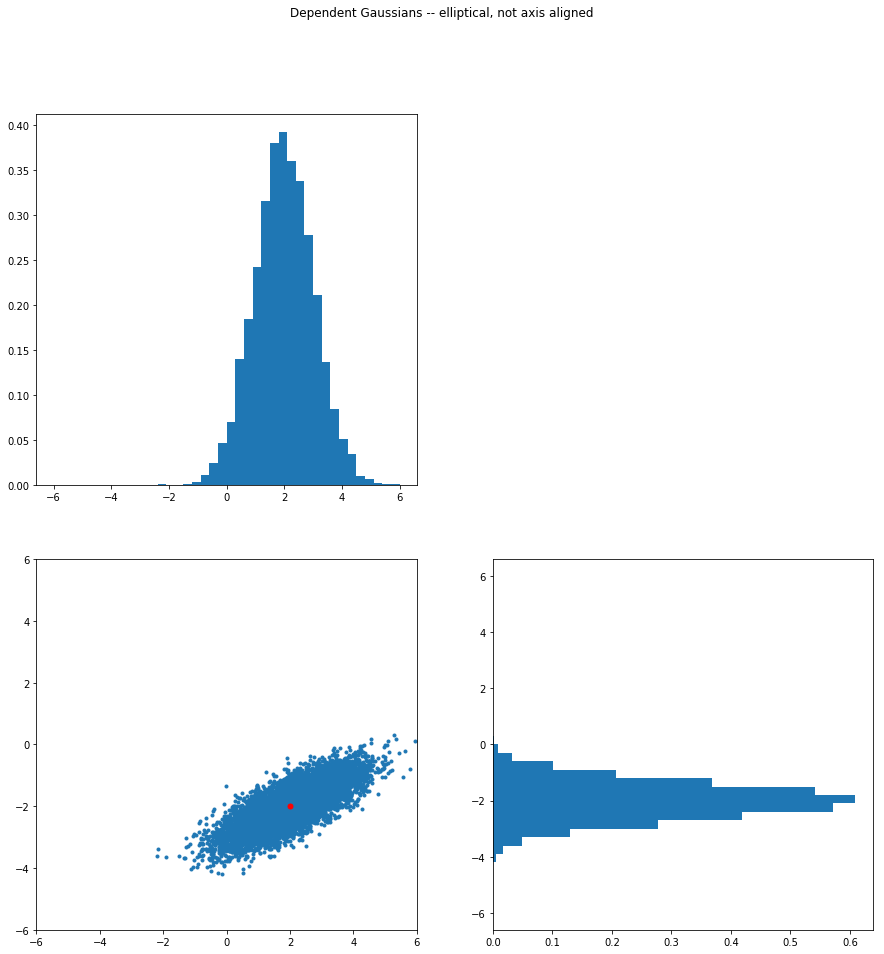

In [37]:
# independent 0 mean, unit variance
z1 = numpy.random.randn(10000)
z2 = numpy.random.randn(10000)

# matrix 2 x 2
A = numpy.asarray([[1,-0.2],[0.4,-0.5]])
# column vector (2 x 1)
mu = numpy.asarray([[2.0],[-2.0]])

z = numpy.vstack((z1,z2))
x = numpy.dot(A,z) + mu
fig = plt.figure(figsize=(15, 15))
bounds = [-6, 6]
plt.subplot(2,2,1)
plt.hist(x[0,:],range=bounds,bins=40,normed=True)
plt.subplot(2,2,4)
plt.hist(x[1,:],range=bounds,bins=40,orientation='horizontal',normed=True)
plt.subplot(2,2,3)
plt.plot(x[0,:],x[1,:],'.')
plt.xlim(bounds)
plt.ylim(bounds)
plt.plot(mu[0],mu[1],'r.',markersize=10)
plt.suptitle('Dependent Gaussians -- elliptical, not axis aligned')
def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

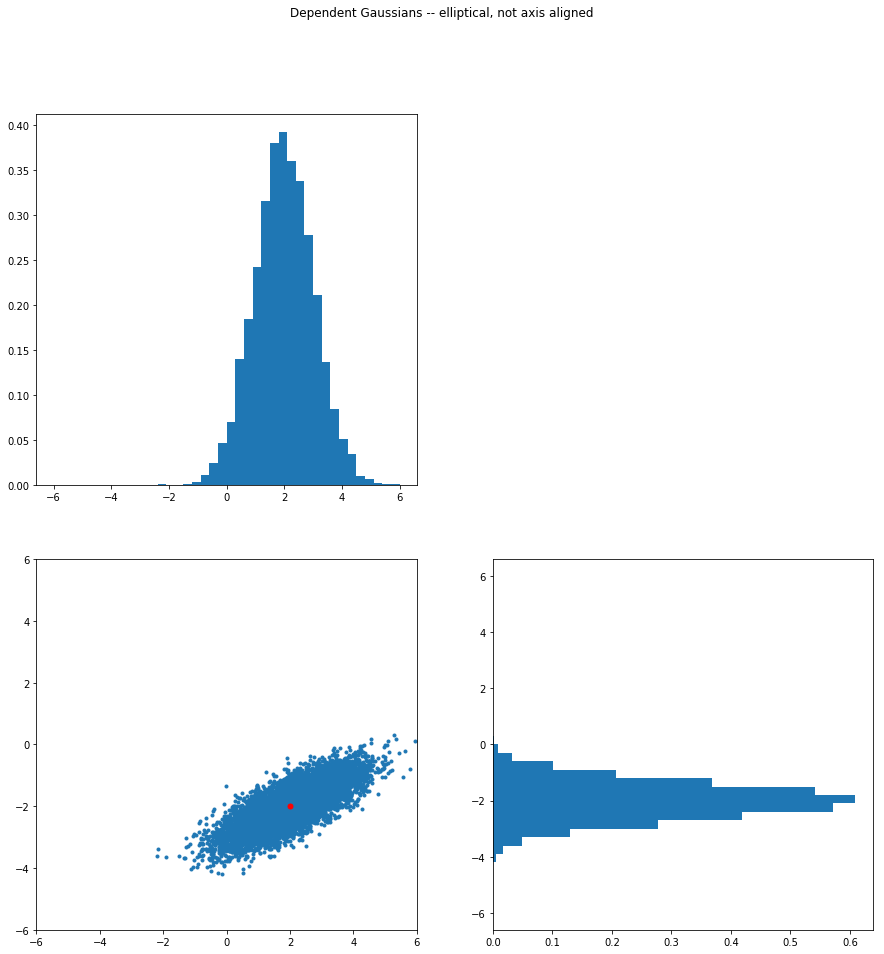

In [38]:
show_figure(fig)
plt.show()

# Multivariate Gaussian Distribution -- Dependent Case

Suppose we have $n$ standard random variables  (0 mean, unit variance)

$$
\begin{aligned}
z_i \sim& \Gaussian{0}{1},&  i=1,\dots p
\end{aligned}
$$

and we are given a vector $\mmu$ of length $n$ and a full-rank matrix $A$ of size $p \times p$

Distribution of $\xx = A\zz + \mu$ is
$$
p(\xx) = \left(2\pi\right)^{-\frac{p}{2}}(\det{\Sigma})^{-\frac{1}{2}}\myexp{\frac{1}{2}(\xx - \mmu)^T\Sigma^{-1}(\xx-\mmu)}
$$
where $\Sigma = AA^T$.

* $\mu$ is **mean** of the Gaussian
* $\Sigma$ is **covariance** matrix


# Multivariate Gaussian Distributions -- Covariance Matrices


Diagonal with constant diagonal -- data looks spherical and axis aligned

$$\Sigma = \sigma^2 I_{p} = \diag{\sigma \ones_p} = 
\begin{bmatrix} \sigma^2& 0& \dots  &0 &0\\
0 & \sigma^2 & \dots & 0 & 0\\
\vdots& \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \dots & \sigma^2 & 0 \\
0 & 0 & \dots & 0 & \sigma^2 \\
\end{bmatrix}$$

Diagonal with non-constant diagonal -- data looks elliptical and axis aligned

$$\Sigma = \diag{\ssigma} = 
\begin{bmatrix} \sigma_1^2& 0& \dots  &0 &0\\
0 & \sigma_2^2 & \dots & 0 & 0\\
\vdots& \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \dots & \sigma_{p-1}^2 & 0 \\
0 & 0 & \dots & 0 & \sigma_p^2 \\
\end{bmatrix}$$

Unconstrained -- data looks elliptical but rotated 

# Maximum Likelihood Estimates of Mean and Covariance

Given data $\{\xx_i \in \reals^n|i=1,\dots,N\}$ maximum likelihood estimates (MLE) of mean and covariance are:

$$
\begin{aligned}
\mmu^{\MLE} &= \frac{1}{N}\sum_{i=1}^N \xx_i\\
\Sigma^{\MLE} & = \frac{1}{N}\sum_{i=1}^N \underbrace{\left(\xx_i - \mmu^{\MLE}\right)\left(\xx_i - \mmu^{\MLE}\right)^T}_{\textrm{ a matrix of size $p \times p$}}
\end{aligned}
$$

Dimensionality
* $\mmu^{\MLE}$ is of same dimension as a single data point $p \times 1$.
* $\Sigma^{\MLE}$ is a matrix of size $p \times p$ 

Note that $\xx\xx^T$ and $\xx^T\xx$ are not the same, former is a matrix, latter is a scalar


# Multivariate Gaussian Distribution

Multivariate Gaussian distribution underlies many machine learning techniques:

* Linear Discriminant Analysis and variants of Naive Bayes -- classification 
* Principal Component Analysis and Factor Analysis -- dimensionality reduction
* Mixture of Gaussians -- clustering
* Kalman filter -- sequential data denoising and prediction
* Graphical models for speech, images and video

In due course, we will introduce closed form expressions for constructing marginal, conditional, and joint distribution

# Generative vs Discriminative Approaches to Classification

Thus far, we posed classification problems in terms of learning conditional probabilities of labels $y$ given features $\xx$

$$
p(y\given \xx,\theta)
$$

and we optimized **conditional** log-likelihood

$$
\loglik(\theta|\yy,X) = \sum_i \log \underbrace{p(y_i \given \xx_i,\theta)}_{\textrm{conditional probability}}
$$

We did not care about how features $\xx$ were distributed

Our aim was to increase probability of labels given features

This approach to learning is called **discriminative** -- we learn to discriminate between different classes


# Generative vs Discriminative Approaches to Classification

Generative models describe all of the data

$$
p(y,\xx\given \theta)
$$

and optimize **joint** log-likelihood

$$
\loglik(\theta\given\yy,X) = \sum_i \log \underbrace{p(y_i, \xx_i\given\theta)}_{\textrm{joint probability}}
 = \sum_i \left[\log \underbrace{p(y_i \given \xx_i,\theta)}_{\textrm{conditional probability}} + {\color{red}{\log \underbrace{p(\xx_i\given\theta)}_{\textrm{marginal probability}}}}\right]$$
 
In this setting, the log-likelihood can be improved by:
1. Increasing conditional probability of labels given features $p(y_i\given\xx_i,\theta)$
2. Increasing probability of features $p(\xx_i\given\theta)$

However, given such a model we can describe how the data as a whole -- both features and labels -- were generated

This approach to learning is called **generative**

# Generative Models for Classification 

There are two ways to factorize joint probability of labels and features

$$
p(y,\xx\given\theta) = p(y\given\xx,\theta)p(\xx\given\theta) =  p(\xx\given y,\theta)p(y\given\theta) 
$$

The second one given us a simple process to *GENERATE* data:

1. First select label according $p(y\given\theta)$, say it was $c$
2. Now generate features $p(\xx\given y=c,\theta)$

Once we have such a model, to *CLASSIFY* new data, we can obtain the conditional probability $p(y\given\xx)$ using Bayes rule

$$
p(y=c\given \xx) = \frac{p(y=c,\xx\given\theta)}{p(\xx\given\theta)} = \frac{p(y=c\given\theta)p(\xx\given y=c,\theta)}{\sum_k p(y=k\given\theta)p(\xx\given y=k,\theta)}
$$

and we can predict label for a new feature vector $\xx$ 

# Generative Models for Classification -- Prediction

If we are only interested in predicting the most likely class -- rather than computing probabilities -- we can simplify math a bit by observing

$$
p(y=c\given \xx) = \frac{p(y=c\given\theta)p(\xx\given y=c,\theta)}{\underbrace{\sum_k p(y=k\given\theta)p(\xx\given y=k,\theta)}_{\textrm{does not depend on c}}}
$$

Hence

$$
p(y=c\given \xx) \propto p(y=c\given\theta)p(\xx\given y=c,\theta)
$$

and 

$$
\begin{aligned}
\mathop{\textrm{argmax}}_c p(y=c\given \xx) &= \mathop{\textrm{argmax}}_c p(y=c\given\theta)p(\xx\given y=c,\theta) \\
&=
\mathop{\textrm{argmax}}_c \log  p(y=c\given\theta) + \log p(\xx\given y=c,\theta)
\end{aligned}
$$


# An Example of a Generative Model

Uniform prior on classes

$$
p(y=c) = \frac{1}{K}
$$

Gaussian distribution of features for each class, different means $\mmu_c$, but same covariance

$$
p(\xx\given y=c,\mmu,\sigma) = \Gaussian{\mmu_c}{\Sigma}
$$

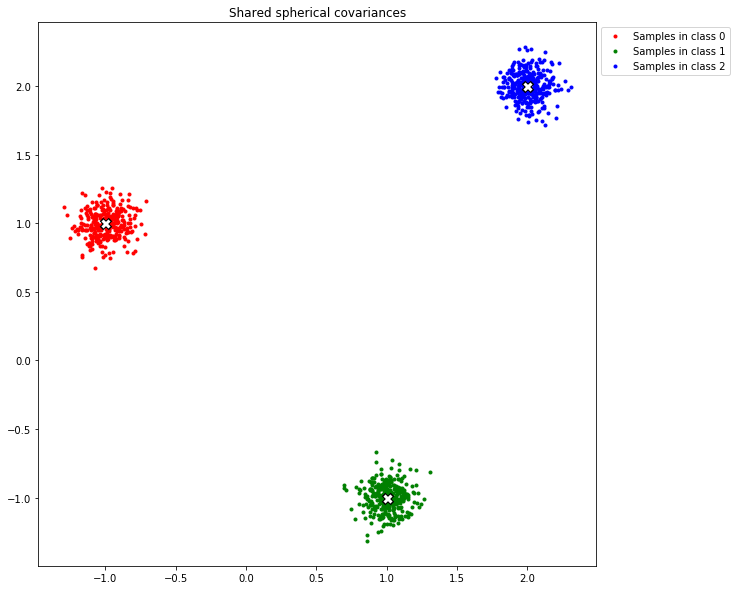

<Figure size 432x288 with 0 Axes>

In [39]:
import numpy
import matplotlib.pyplot as plt

def generate_data(N,d,K,proby,mus,A):
    # This function will generate data from 
    # K Gaussians. Each Gaussian has different mean
    # mus[:,c] is mean for the c-th Gaussian
    # Covariance Sigma = A^T A is shared between 
    # Gaussians.
    
    ys = [0]*N
    xs = numpy.zeros((d,N))
    for i in range(N):
        # Sample class according to the prior p(y)
        # in this case it is uniform
        ys[i] = numpy.random.choice(K,1)      
        # Sample feature values according to p(x|y)
        # In this case, x ~ N(mmu[y[i]],sigma2*I)
        # To accomplish this, draw z1,z2 ~ N(0,I)    
        z = numpy.random.randn(2,1)
        # transform by matrix A and shift by class mean
        x = numpy.dot(A,z) + mus[:,ys[i]]  
        xs[:,i] = x[:,0]
    return xs,ys

def plot_samples(xs,ys,mus=None,colors=['r','g','b']):
    K = numpy.max(ys)+1
    colors = ['r','g','b']
    for c in range(K):
        # indices of samples assigned to class c
        ind = [i for i in range(N) if ys[i]==c]
        plt.plot(xs[0,ind],xs[1,ind],colors[c]+'.',label='Samples in class '+str(c))    
        if not mus is None:
            plt.plot(mus[0,c],mus[1,c],'kx',markersize=9,markeredgewidth=5)
            plt.plot(mus[0,c],mus[1,c],'wx',markersize=7,markeredgewidth=3)

    plt.legend(loc=2, bbox_to_anchor=(1,1))

N = 1000 # 100 samples
K = 3   # 3 classes
d = 2   # x is 2d 
proby = [1.0/K]*K # [1./3. , 1./3., 1./3.]
mus = 1.0*numpy.asarray([[-1.0,1.0,2],[1.0,-1.0,2.0]])
sigma = 0.1 # standard deviation, variance is 0.01
# A just scales each coordinate by sigma
A = sigma*numpy.eye(2)
xs,ys = generate_data(N,d,K,proby,mus,A)
fig = plt.figure(figsize=(10, 10))
plot_samples(xs,ys,mus)
plt.title('Shared spherical covariances')
plt.figure()

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

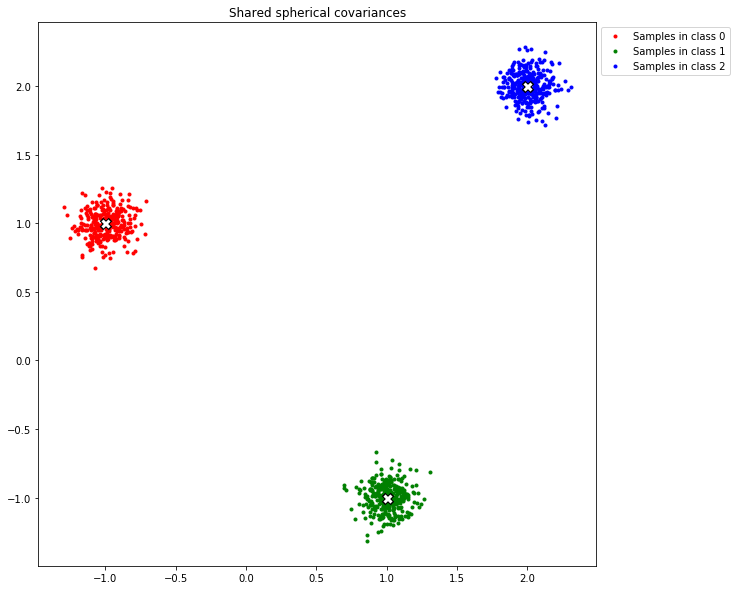

In [40]:
show_figure(fig)
plt.show()

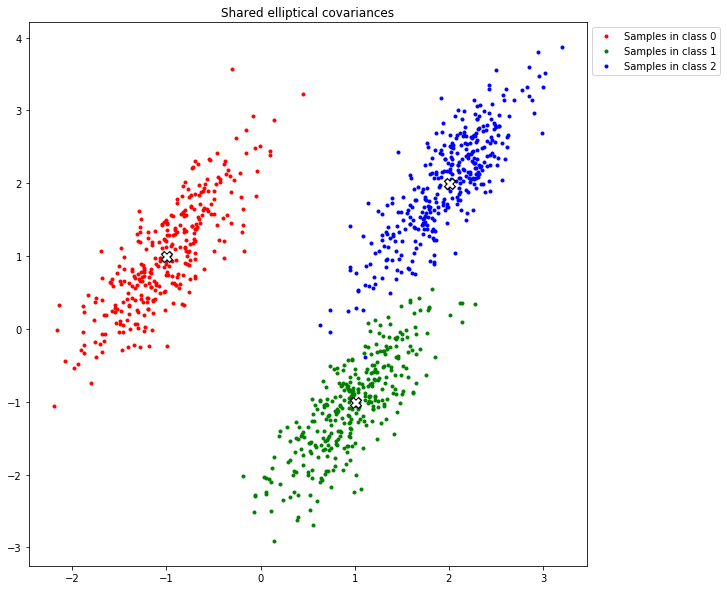

In [41]:
# this A scales and rotates 
numpy.random.seed(2)
A = numpy.random.rand(2,2)
xs,ys = generate_data(N,d,K,proby,mus,A)
fig = plt.figure(figsize=(10, 10))
plot_samples(xs,ys,mus)
plt.title('Shared elliptical covariances');

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

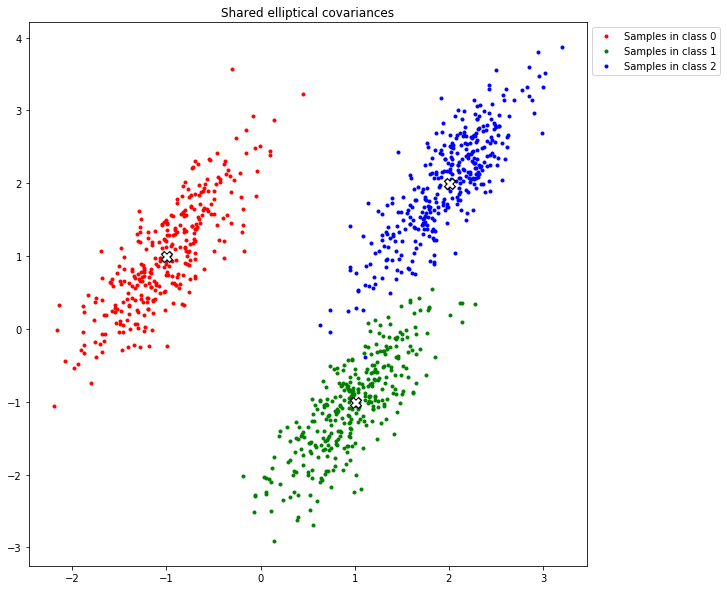

In [42]:
show_figure(fig)
plt.show()

# Today

* Gradients for multi-class logistic regression
* Stochastic gradient descent
* An example of online learning
* Linear Transformations review
* Multivariate Gaussian distribution
* Generative vs discriminative models